# House Price Prediciton

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
h = pd.read_csv("train.csv",index_col='Id')

In [78]:
h.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [79]:
import io
buffer = io.StringIO()
h.info(buf=buffer)
s = buffer.getvalue()
df=pd.DataFrame(s.split("\n"),columns=['info'])
df = df[5:85]
print(df)

                                           info
5    0   MSSubClass     1460 non-null   int64  
6    1   MSZoning       1460 non-null   object 
7    2   LotFrontage    1201 non-null   float64
8    3   LotArea        1460 non-null   int64  
9    4   Street         1460 non-null   object 
..                                          ...
80   75  MoSold         1460 non-null   int64  
81   76  YrSold         1460 non-null   int64  
82   77  SaleType       1460 non-null   object 
83   78  SaleCondition  1460 non-null   object 
84   79  SalePrice      1460 non-null   int64  

[80 rows x 1 columns]


In [80]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Condition effect on price

In [81]:
condn1 = sorted(h.Condition1)
condn2 = sorted(h.Condition2)

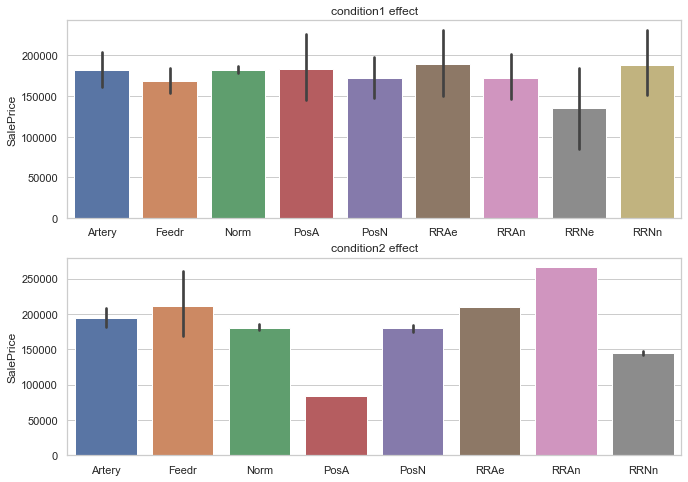

In [82]:
plt.figure(figsize=[11,8])
plt.subplot(2,1,1)
plt.title("condition1 effect")
sns.barplot(data=h,x=condn1,y="SalePrice")
plt.subplot(2,1,2)
plt.title("condition2 effect")
sns.barplot(data=h,x=condn2,y="SalePrice")

#h.Condition1.value_counts().plot.pie()
plt.show()

#### It is seen that when there are more than one proximity, those that are close to North South Rail Road goes for  higher price.  And in general Houses near North Rail Road has high price

## Garage and price

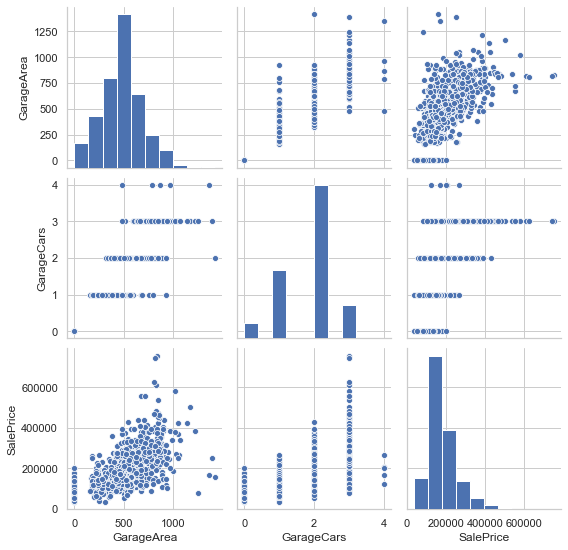

In [83]:
#h.GarageArea
sns.pairplot(data = h, vars= ["GarageArea","GarageCars","SalePrice"])
plt.show()

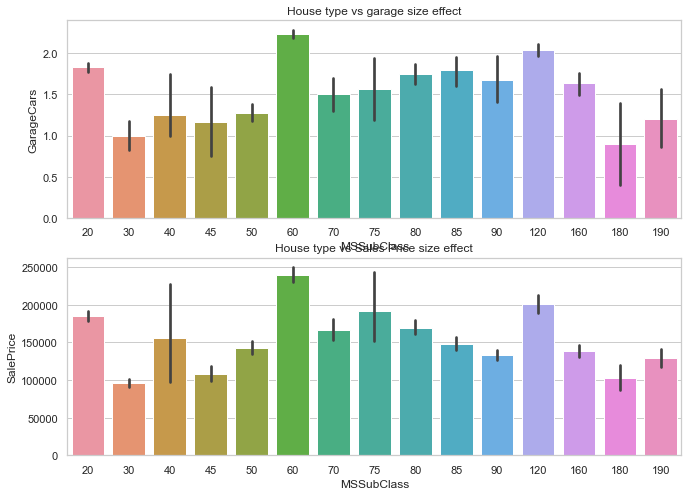

In [84]:
plt.figure(figsize=[11,8])
plt.subplot(2,1,1)
plt.title("House type vs garage size effect")
sns.barplot(data=h,x="MSSubClass",y="GarageCars")
plt.subplot(2,1,2)
plt.title("House type vs Sales Price size effect")
sns.barplot(data=h,x="MSSubClass",y="SalePrice")

### sale price is highest for houses with 3 garage cars - 2-STORY 1946 & NEWER is seen to be the costliest and 1-STORY 1945 & OLDER to be the least costliest

## Year Sold vs Price

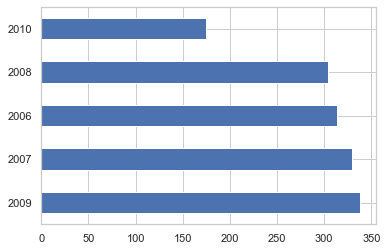

In [85]:
h.YrSold.value_counts().plot.barh()

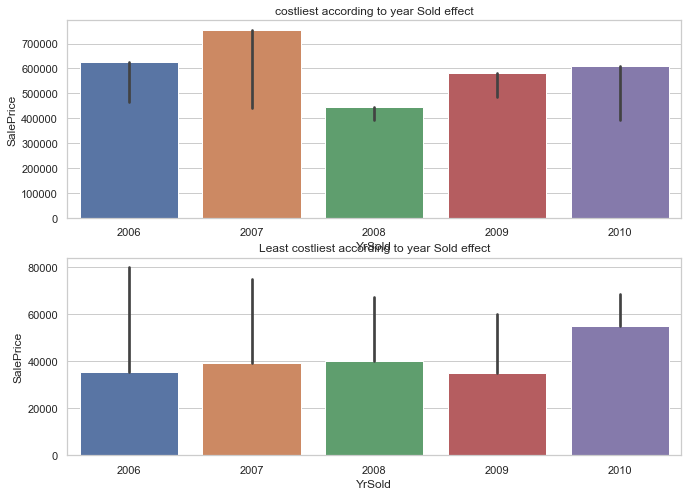

In [86]:
plt.figure(figsize=[11,8])
plt.subplot(2,1,1)
plt.title("costliest according to year Sold effect")
sns.barplot(data=h,x="YrSold",y="SalePrice",estimator=np.max)
plt.subplot(2,1,2)
plt.title("Least costliest according to year Sold effect")
sns.barplot(data=h,x="YrSold",y="SalePrice",estimator=np.min)

### Most of the houses are sold from 2009 but the costlies house sold is from 2007 and the least costliest in 2006 and 2009

In [87]:
#h.info()
#print(
h[['LotFrontage','Fence','BldgType','HouseStyle', 'MSSubClass', 'MSZoning']]

,LotFrontage,Fence,BldgType,HouseStyle,MSSubClass,MSZoning
Id,,,,,,
1,65.0,NaN,1Fam,2Story,60,RL
2,80.0,NaN,1Fam,1Story,20,RL
3,68.0,NaN,1Fam,2Story,60,RL
4,60.0,NaN,1Fam,2Story,70,RL
5,84.0,NaN,1Fam,2Story,60,RL
...,...,...,...,...,...,...
1456,62.0,NaN,1Fam,2Story,60,RL
1457,85.0,MnPrv,1Fam,1Story,20,RL
1458,66.0,GdPrv,1Fam,2Story,70,RL


In [88]:
h[h.Fence.isnull()].HouseStyle.value_counts()

1Story    592
2Story    391
1.5Fin    109
SLvl       37
SFoyer     26
1.5Unf     10
2.5Unf      8
2.5Fin      6
Name: HouseStyle, dtype: int64

### Remove NaN from Fence - substitute it with None to indicate there is no Fence

In [89]:
h.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [90]:
h[h.Fence.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000


In [91]:
h.Fence.isnull().sum()

1179

In [92]:
h.Fence=h.Fence.fillna('None')

### How fence effect sale price

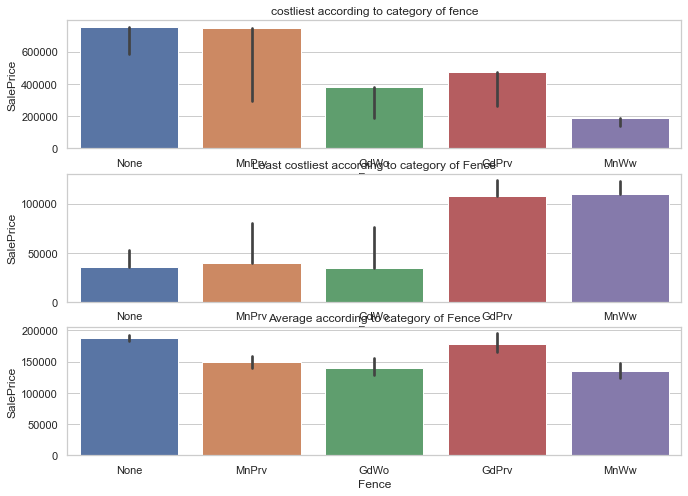

In [93]:
plt.figure(figsize=[11,8])
sns.set(style="whitegrid")
plt.subplot(3,1,1)
plt.title("costliest according to category of fence")
sns.barplot(data=h,x="Fence",y="SalePrice",estimator=np.max)
plt.subplot(3,1,2)
plt.title("Least costliest according to category of Fence")
sns.barplot(data=h,x="Fence",y="SalePrice",estimator=np.min)
plt.subplot(3,1,3)
plt.title("Average according to category of Fence")
sns.barplot(data=h,x="Fence",y="SalePrice",estimator=np.mean)
plt.show()

#### Its observed that property with minimum or no fence hold the highest and least sale price while property wit minimum privacy hold a larger margin

Alley - Nan is changed to NoAcces

In [94]:
h[h.Alley.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,None,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,None,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,None,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,None,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,None,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,None,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [95]:
h.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [96]:
h.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [97]:
h.Alley=h.Alley.fillna('NoAces')

#### Linear feet of street connected to property

In [98]:
h[(~h.LotFrontage.isnull())][['LotFrontage','LotConfig','Fence','Alley','BldgType','HouseStyle', 'MSSubClass', 'MSZoning']]

,LotFrontage,LotConfig,Fence,Alley,BldgType,HouseStyle,MSSubClass,MSZoning
Id,,,,,,,,
1,65.0,Inside,None,NoAces,1Fam,2Story,60,RL
2,80.0,FR2,None,NoAces,1Fam,1Story,20,RL
3,68.0,Inside,None,NoAces,1Fam,2Story,60,RL
4,60.0,Corner,None,NoAces,1Fam,2Story,70,RL
5,84.0,FR2,None,NoAces,1Fam,2Story,60,RL
...,...,...,...,...,...,...,...,...
1456,62.0,Inside,None,NoAces,1Fam,2Story,60,RL
1457,85.0,Inside,MnPrv,NoAces,1Fam,1Story,20,RL
1458,66.0,Inside,GdPrv,NoAces,1Fam,2Story,70,RL


In [99]:
h[((h.LotFrontage.isnull())& (h.Alley!='NoAces'))][['LotFrontage','LotConfig','Fence','Alley','BldgType','HouseStyle', 'MSSubClass', 'MSZoning']]

,LotFrontage,LotConfig,Fence,Alley,BldgType,HouseStyle,MSSubClass,MSZoning
Id,,,,,,,,
308,NaN,Inside,MnPrv,Grvl,1Fam,1.5Fin,50,RM
329,NaN,Inside,None,Pave,1Fam,2.5Unf,75,RL
362,NaN,Inside,None,Pave,1Fam,1.5Fin,50,RL
459,NaN,Inside,MnPrv,Grvl,1Fam,2Story,70,RM
1178,NaN,Inside,None,Grvl,1Fam,1.5Fin,50,RM


In [100]:
h[((h.LotFrontage.isnull())& (h.Alley=='NoAces'))][['LotFrontage','LotConfig','Fence','Alley','BldgType','HouseStyle', 'MSSubClass', 'MSZoning']]

,LotFrontage,LotConfig,Fence,Alley,BldgType,HouseStyle,MSSubClass,MSZoning
Id,,,,,,,,
8,NaN,Corner,None,NoAces,1Fam,2Story,60,RL
13,NaN,Inside,None,NoAces,1Fam,1Story,20,RL
15,NaN,Corner,GdWo,NoAces,1Fam,1Story,20,RL
17,NaN,CulDSac,None,NoAces,1Fam,1Story,20,RL
25,NaN,Inside,MnPrv,NoAces,1Fam,1Story,20,RL
...,...,...,...,...,...,...,...,...
1430,NaN,Corner,None,NoAces,1Fam,1Story,20,RL
1432,NaN,Inside,None,NoAces,TwnhsE,1Story,120,RL
1442,NaN,Inside,None,NoAces,TwnhsE,1Story,120,RM


In [101]:
h.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [102]:
h[h.LotFrontage.isnull()].LotConfig.value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [103]:
h[((h.LotFrontage.isnull())&(h.LotConfig =='FR2'))][['LotFrontage','LotConfig','LotArea','Fence','Alley','BldgType','HouseStyle', 'MSSubClass', 'MSZoning']]

,LotFrontage,LotConfig,LotArea,Fence,Alley,BldgType,HouseStyle,MSSubClass,MSZoning
Id,,,,,,,,,
215,NaN,FR2,10900,MnPrv,NoAces,1Fam,2Story,60,RL
365,NaN,FR2,18800,None,NoAces,1Fam,2Story,60,RL
422,NaN,FR2,16635,None,NoAces,1Fam,1Story,20,RL
538,NaN,FR2,12735,MnWw,NoAces,1Fam,1Story,20,RL
542,NaN,FR2,11000,None,NoAces,1Fam,2Story,60,RL
612,NaN,FR2,10395,MnPrv,NoAces,1Fam,SLvl,80,RL
688,NaN,FR2,5105,None,NoAces,TwnhsE,2Story,160,FV
942,NaN,FR2,8755,GdPrv,NoAces,1Fam,2Story,60,RL
976,NaN,FR2,2651,None,NoAces,Twnhs,2Story,160,FV


#### Removing data (14) where LotConfig is FR2 (having 2 frontage) but LotFrontage is null

In [105]:
h.shape

(1460, 80)

In [108]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Pool

In [106]:
h.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [120]:
h.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [114]:
h[~h.PoolQC.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NoAces,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NoAces,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NoAces,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NoAces,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NoAces,IR3,Bnk,AllPub,Corner,...,480,Gd,None,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NoAces,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NoAces,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [109]:
h.columns[h.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature'],
      dtype='object')

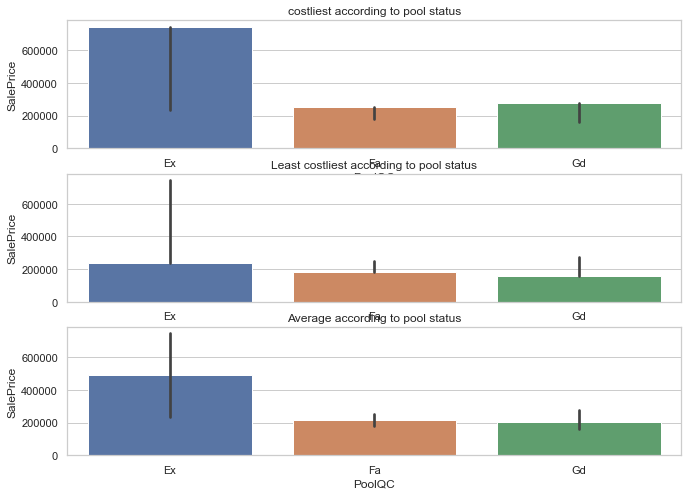

In [115]:
plt.figure(figsize=[11,8])
sns.set(style="whitegrid")
plt.subplot(3,1,1)
plt.title("costliest according to pool status")
sns.barplot(data=h,x="PoolQC",y="SalePrice",estimator=np.max)
plt.subplot(3,1,2)
plt.title("Least costliest according to pool status")
sns.barplot(data=h,x="PoolQC",y="SalePrice",estimator=np.min)
plt.subplot(3,1,3)
plt.title("Average according to pool status")
sns.barplot(data=h,x="PoolQC",y="SalePrice",estimator=np.mean)
plt.show()

In [116]:
h[h["SalePrice"]>600000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NoAces,IR1,Lvl,AllPub,Corner,...,0,NaN,None,NaN,0,1,2007,WD,Normal,755000
899,20,RL,100.0,12919,Pave,NoAces,IR1,Lvl,AllPub,Inside,...,0,NaN,None,NaN,0,3,2010,New,Partial,611657
1170,60,RL,118.0,35760,Pave,NoAces,IR1,Lvl,AllPub,CulDSac,...,0,NaN,None,NaN,0,7,2006,WD,Normal,625000
1183,60,RL,160.0,15623,Pave,NoAces,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


## Lot Area vs Sales price

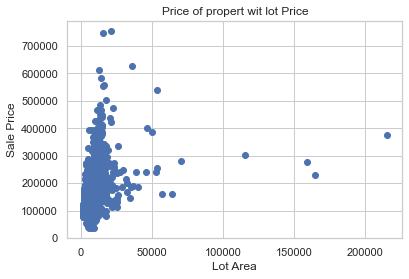

In [121]:
plt.title('Price of propert wit lot Price')
plt.scatter(h.LotArea,h.SalePrice)
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()


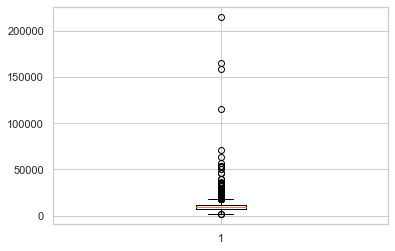

In [123]:
plt.boxplot(h.LotArea)
plt.show()

In [127]:
h[h.LotArea>50000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,NoAces,IR1,Low,AllPub,Inside,...,0,NaN,None,NaN,0,11,2006,WD,Normal,385000
250,50,RL,NaN,159000,Pave,NoAces,IR2,Low,AllPub,CulDSac,...,0,NaN,None,Shed,500,6,2007,WD,Normal,277000
314,20,RL,150.0,215245,Pave,NoAces,IR3,Low,AllPub,Inside,...,0,NaN,None,NaN,0,6,2009,WD,Normal,375000
336,190,RL,NaN,164660,Grvl,NoAces,IR1,HLS,AllPub,Corner,...,0,NaN,None,Shed,700,8,2008,WD,Normal,228950
385,60,RL,NaN,53107,Pave,NoAces,IR2,Low,AllPub,Corner,...,0,NaN,None,NaN,0,6,2007,WD,Normal,240000
452,20,RL,62.0,70761,Pave,NoAces,IR1,Low,AllPub,Inside,...,0,NaN,None,NaN,0,12,2006,WD,Normal,280000
458,20,RL,NaN,53227,Pave,NoAces,IR1,Low,AllPub,CulDSac,...,0,NaN,None,NaN,0,3,2008,WD,Normal,256000
707,20,RL,NaN,115149,Pave,NoAces,IR2,Low,AllPub,CulDSac,...,0,NaN,None,NaN,0,6,2007,WD,Normal,302000
770,60,RL,47.0,53504,Pave,NoAces,IR2,HLS,AllPub,CulDSac,...,0,NaN,None,NaN,0,6,2010,WD,Normal,538000


### Area above 30000 seems to be outlier hence removing - Low price and 

In [136]:
h2=h2[h2.LotArea<30000]

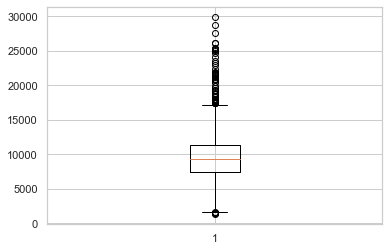

In [137]:
plt.boxplot(h2.LotArea)
plt.show()

### Price vs Quality of house

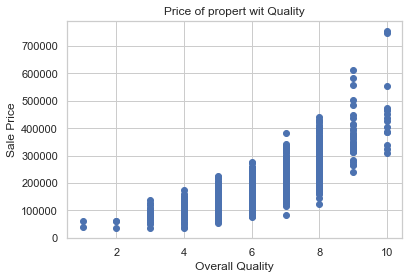

In [149]:
plt.title('Price of propert wit Quality')
plt.scatter(h2.OverallQual,h2.SalePrice)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26629eaad00>,
 'caps': [<matplotlib.lines.Line2D at 0x26629eaa370>,
 'boxes': [<matplotlib.lines.Line2D at 0x26629eaa280>],
 'medians': [<matplotlib.lines.Line2D at 0x266292861f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26629163490>],
 'means': []}

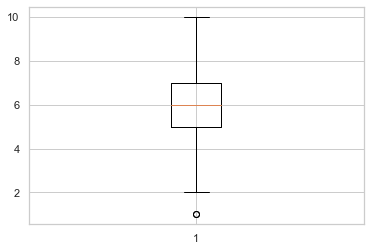

In [150]:
#h.OverallQual.describe()
plt.boxplot(h2.OverallQual)

### Price increases with Quality